# This analysis File explores the player funnel, retention, engagement, and deposit behavior from 5 datasets. It identifies key drop-off stages, highlights the impact of deposit–bet gaps on engagement, and shows how deposits are concentrated among top players. Insights help understand player profitability patterns and revenue dependencies.

# Key libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning And PreProcessing

In [2]:
BonusCost_Data = pd.read_excel('BonusCost_Data.xlsx')
Player_Details = pd.read_excel('Player_Details.xlsx')
First_Deposit_Data = pd.read_excel('First_Deposit_Data.xlsx')
First_Bet_Data = pd.read_excel('First_Bet_Data.xlsx')
Player_Activity = pd.read_excel('Player_Activity_Data.xlsx')

In [3]:
Player_Activity.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
1,NaN,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500,0,500,420
2,NaN,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.63,34.9692
3,NaN,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.4,46.2,27.2,22.848
4,NaN,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52,21.7,30.3,25.452


In [4]:
Player_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860231 entries, 0 to 860230
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  0 non-null       float64
 1   Unnamed: 1  860231 non-null  object 
 2   Unnamed: 2  860231 non-null  object 
 3   Unnamed: 3  860231 non-null  object 
 4   Unnamed: 4  860231 non-null  object 
 5   Unnamed: 5  860231 non-null  object 
 6   Unnamed: 6  860231 non-null  object 
 7   Unnamed: 7  860231 non-null  object 
 8   Unnamed: 8  860231 non-null  object 
 9   Unnamed: 9  860231 non-null  object 
dtypes: float64(1), object(9)
memory usage: 65.6+ MB


### Dropping first Column in all datasets( as all datasets are in same pattern) and shifting headers to column names

In [5]:
BonusCost_Data.columns = BonusCost_Data.iloc[0].values
BonusCost_Data = BonusCost_Data.iloc[1:].reset_index(drop = True)
BonusCost_Data = BonusCost_Data.drop( BonusCost_Data.columns[0], axis = 1 )

Player_Details.columns = Player_Details.iloc[0].values
Player_Details = Player_Details.iloc[1:].reset_index(drop = True)
Player_Details = Player_Details.drop( Player_Details.columns[0], axis = 1 )


First_Deposit_Data.columns = First_Deposit_Data.iloc[0].values
First_Deposit_Data = First_Deposit_Data.iloc[1:].reset_index(drop = True)
First_Deposit_Data = First_Deposit_Data.drop( First_Deposit_Data.columns[0], axis = 1 )

First_Bet_Data.columns = First_Bet_Data.iloc[0].values
First_Bet_Data = First_Bet_Data.iloc[1:].reset_index(drop = True)
First_Bet_Data = First_Bet_Data.drop( First_Bet_Data.columns[0], axis = 1 )

Player_Activity.columns = Player_Activity.iloc[0].values
Player_Activity = Player_Activity.iloc[1:].reset_index(drop = True)
Player_Activity = Player_Activity.drop( Player_Activity.columns[0], axis = 1 )

In [6]:
Player_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860230 entries, 0 to 860229
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   src_player_id     860230 non-null  object
 1   ActivityMonth     860230 non-null  object
 2   Product           860230 non-null  object
 3   SubProduct        860230 non-null  object
 4   ActivePlayerDays  860230 non-null  object
 5   Bet_Amount        860230 non-null  object
 6   Win_Amount        860230 non-null  object
 7   Gross_Win         860230 non-null  object
 8   Net_Gross_Win     860230 non-null  object
dtypes: object(9)
memory usage: 59.1+ MB


In [7]:
Player_Activity.head()

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500,0,500,420
1,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.63,34.9692
2,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.4,46.2,27.2,22.848
3,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52,21.7,30.3,25.452
4,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74,54.6,18.6674,15.680616


In [8]:
df5 = Player_Activity.copy()

In [9]:


df5['ActivePlayerDays'] = df5['ActivePlayerDays'].astype(int)

columns_to_float = ['Bet_Amount', 'Win_Amount', 'Gross_Win', 'Net_Gross_Win']
df5[columns_to_float] = df5[columns_to_float].astype(float)

In [10]:
df5.head()

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
1,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
2,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
3,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
4,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616


In [11]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860230 entries, 0 to 860229
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   src_player_id     860230 non-null  object 
 1   ActivityMonth     860230 non-null  object 
 2   Product           860230 non-null  object 
 3   SubProduct        860230 non-null  object 
 4   ActivePlayerDays  860230 non-null  int64  
 5   Bet_Amount        860230 non-null  float64
 6   Win_Amount        860230 non-null  float64
 7   Gross_Win         860230 non-null  float64
 8   Net_Gross_Win     860230 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 59.1+ MB


In [12]:
df5.describe()

,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
count,860230.000000,8.602300e+05,8.602300e+05,860230.000000,860230.000000
mean,6.352093,3.368930e+03,3.212913e+03,153.665203,129.080785
std,7.692135,3.531186e+04,3.515184e+04,2556.753692,2147.692465
min,1.000000,0.000000e+00,-1.834000e+04,-874294.300000,-734407.212000
25%,1.000000,1.600000e+01,0.000000e+00,1.000000,0.840000
50%,3.000000,1.047050e+02,3.479000e+01,27.000000,22.680000
75%,8.000000,7.300000e+02,5.622900e+02,128.000000,107.520000
max,31.000000,7.358337e+06,7.488657e+06,303359.000000,254821.560000


In [13]:
BonusCost_Data.head()

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
0,16051927,2020-06-30 00:00:00,eGaming,50
1,19309540,2021-02-28 00:00:00,eGaming,40
2,13176431,2020-01-31 00:00:00,eGaming,15
3,12405628,2019-02-28 00:00:00,SportsBook,30
4,17486248,2021-02-28 00:00:00,eGaming,25


In [14]:
BonusCost_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207070 entries, 0 to 207069
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Src_PLAYER_ID  207070 non-null  object
 1   ActivityMonth  207070 non-null  object
 2   Product        207070 non-null  object
 3   BONUS_COST     207070 non-null  object
dtypes: object(4)
memory usage: 6.3+ MB


In [15]:
df1 = BonusCost_Data.copy()

df1['BONUS_COST'] = df1['BONUS_COST'].astype(int)

df1['ActivityMonth'] = pd.to_datetime(df1['ActivityMonth']).dt.to_period('M').astype(str)

In [16]:
df1.describe()

,BONUS_COST
count,207070.000000
mean,113.295968
std,227.082709
min,0.000000
25%,20.000000
50%,49.000000
75%,100.000000
max,9900.000000


In [17]:
df2 = Player_Details.copy()
df2.head()

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05 00:00:00,N
1,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09 00:00:00,N
2,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15 00:00:00,N
3,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15 00:00:00,N
4,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07 00:00:00,N


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Src_Player_Id        292785 non-null  object
 1   Signup_Date          292785 non-null  object
 2   acquisition_channel  201279 non-null  object
 3   src_advertiser_id    290719 non-null  object
 4   Gender               292774 non-null  object
 5   Date_Of_Birth        292785 non-null  object
 6   Internal_Player_YN   292785 non-null  object
dtypes: object(7)
memory usage: 15.6+ MB


In [19]:
df2['Date_Of_Birth'] = pd.to_datetime(df2['Date_Of_Birth'])
df2['Signup_Date'] = pd.to_datetime(df2['Signup_Date'])

In [20]:
df2.head()

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05,N
1,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09,N
2,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15,N
3,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15,N
4,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07,N


In [21]:
df2.isnull().mean()

Src_Player_Id          0.000000
Signup_Date            0.000000
acquisition_channel    0.312537
src_advertiser_id      0.007056
Gender                 0.000038
Date_Of_Birth          0.000000
Internal_Player_YN     0.000000
dtype: float64

In [22]:
df2.describe()

,Signup_Date,Date_Of_Birth
count,292785,292785
mean,2020-04-19 03:50:26.724425984,1989-01-24 16:25:15.304878976
min,2019-01-01 00:39:26,1900-01-01 00:00:00
25%,2019-09-17 12:26:23,1982-10-03 00:00:00
50%,2020-04-11 10:55:41,1991-07-26 00:00:00
75%,2020-12-13 10:41:21,1998-04-28 00:00:00
max,2021-07-13 00:53:37,2021-03-23 09:18:02


In [23]:
df3 = First_Deposit_Data.copy()
df3.head()

,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
0,13472812,NaN,NaN,NaN,NaN
1,13331793,NaN,NaN,NaN,NaN
2,13116242,NaN,NaN,NaN,NaN
3,12689016,NaN,NaN,NaN,NaN
4,12681525,NaN,NaN,NaN,NaN


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Src_Player_Id          292785 non-null  object
 1   First_Deposit_Date     127261 non-null  object
 2   First_Deposit_Channel  127261 non-null  object
 3   First_Deposit_Method   127261 non-null  object
 4   First_Deposit_Amount   127261 non-null  object
dtypes: object(5)
memory usage: 11.2+ MB


In [25]:
df3.isnull().mean()

Src_Player_Id            0.000000
First_Deposit_Date       0.565343
First_Deposit_Channel    0.565343
First_Deposit_Method     0.565343
First_Deposit_Amount     0.565343
dtype: float64

In [26]:
df3_no_Nulls = df3.dropna().reset_index(drop = True)

In [27]:
df3_no_Nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127261 entries, 0 to 127260
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Src_Player_Id          127261 non-null  object
 1   First_Deposit_Date     127261 non-null  object
 2   First_Deposit_Channel  127261 non-null  object
 3   First_Deposit_Method   127261 non-null  object
 4   First_Deposit_Amount   127261 non-null  object
dtypes: object(5)
memory usage: 4.9+ MB


In [28]:
df3_no_Nulls['First_Deposit_Date'] = pd.to_datetime(df3_no_Nulls['First_Deposit_Date'])
df3['First_Deposit_Date'] = pd.to_datetime(df3['First_Deposit_Date'])


In [29]:
df3_no_Nulls['First_Deposit_Amount'] = df3_no_Nulls['First_Deposit_Amount'].astype(float)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Src_Player_Id          292785 non-null  object        
 1   First_Deposit_Date     127261 non-null  datetime64[ns]
 2   First_Deposit_Channel  127261 non-null  object        
 3   First_Deposit_Method   127261 non-null  object        
 4   First_Deposit_Amount   127261 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 11.2+ MB


In [31]:
df3_no_Nulls.describe()

,First_Deposit_Date,First_Deposit_Amount
count,127261,127261.000000
mean,2020-05-18 17:13:42.732408320,122.604902
min,2019-01-01 09:55:27,10.000000
25%,2019-10-21 16:53:13,30.000000
50%,2020-06-15 07:41:03,50.000000
75%,2021-01-04 18:36:03,100.000000
max,2021-07-12 21:46:38,13000.000000
std,NaN,211.805569


In [32]:
df4 = First_Bet_Data.copy()
df4.head()

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
0,15643431,2020-10-09 03:57:29,2.5,eGaming,Non Table Games,Online,Mobile
1,13593034,2019-09-27 15:03:58.244000,10,Sports,Prematch,Online,Mobile
2,15894194,2021-02-28 02:22:07,2,eGaming,Non Table Games,Online,Web
3,13238000,2019-07-08 10:39:45,0.4,eGaming,Non Table Games,Online,Mobile
4,12866848,2019-04-27 14:20:27,0.4,eGaming,Non Table Games,Online,Mobile


In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Src_Player_Id                   292785 non-null  object
 1   System_First_Bet_Datetime       159166 non-null  object
 2   System_First_BetSlip_Amt        159166 non-null  object
 3   System_First_Bet_Product_Group  159166 non-null  object
 4   System_First_Bet_Product        159166 non-null  object
 5   System_First_Bet_Channel        159166 non-null  object
 6   System_First_Bet_Platform       159166 non-null  object
dtypes: object(7)
memory usage: 15.6+ MB


In [34]:
df4.isnull().sum()

Src_Player_Id                          0
System_First_Bet_Datetime         133619
System_First_BetSlip_Amt          133619
System_First_Bet_Product_Group    133619
System_First_Bet_Product          133619
System_First_Bet_Channel          133619
System_First_Bet_Platform         133619
dtype: int64

In [35]:
df4_No_Nulls = df4.dropna().reset_index(drop = True)

In [36]:
df4_No_Nulls.shape

(159166, 7)

In [37]:
df4['System_First_Bet_Datetime'] = pd.to_datetime(df4['System_First_Bet_Datetime'])
df4['System_First_BetSlip_Amt'] = df4['System_First_BetSlip_Amt'].astype(float)

In [38]:
df4_No_Nulls = df4.dropna().reset_index(drop = True)
df4_No_Nulls.shape

(159166, 7)

In [39]:
df4

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
0,15643431,2020-10-09 03:57:29.000,2.5,eGaming,Non Table Games,Online,Mobile
1,13593034,2019-09-27 15:03:58.244,10.0,Sports,Prematch,Online,Mobile
2,15894194,2021-02-28 02:22:07.000,2.0,eGaming,Non Table Games,Online,Web
3,13238000,2019-07-08 10:39:45.000,0.4,eGaming,Non Table Games,Online,Mobile
4,12866848,2019-04-27 14:20:27.000,0.4,eGaming,Non Table Games,Online,Mobile
...,...,...,...,...,...,...,...
292780,18703784,NaT,NaN,NaN,NaN,NaN,NaN
292781,12340331,2020-05-19 07:44:29.000,0.8,eGaming,Non Table Games,Online,Web
292782,12343435,2019-01-04 14:08:42.000,1.0,eGaming,Non Table Games,Online,Mobile
292783,12358643,2019-01-08 12:22:11.442,1.0,Sports,Prematch,Online,Mobile


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Src_Player_Id                   292785 non-null  object        
 1   System_First_Bet_Datetime       159166 non-null  datetime64[ns]
 2   System_First_BetSlip_Amt        159166 non-null  float64       
 3   System_First_Bet_Product_Group  159166 non-null  object        
 4   System_First_Bet_Product        159166 non-null  object        
 5   System_First_Bet_Channel        159166 non-null  object        
 6   System_First_Bet_Platform       159166 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 15.6+ MB


In [41]:
df2.columns

Index(['Src_Player_Id', 'Signup_Date', 'acquisition_channel',
       'src_advertiser_id', 'Gender', 'Date_Of_Birth', 'Internal_Player_YN'],
      dtype='object')

In [42]:
df3.columns

Index(['Src_Player_Id', 'First_Deposit_Date', 'First_Deposit_Channel',
       'First_Deposit_Method', 'First_Deposit_Amount'],
      dtype='object')

In [43]:
df5.columns

Index(['src_player_id', 'ActivityMonth', 'Product', 'SubProduct',
       'ActivePlayerDays', 'Bet_Amount', 'Win_Amount', 'Gross_Win',
       'Net_Gross_Win'],
      dtype='object')

In [44]:
df5 = df5.rename(columns= {'src_player_id': 'Src_Player_Id'})

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860230 entries, 0 to 860229
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Src_Player_Id     860230 non-null  object 
 1   ActivityMonth     860230 non-null  object 
 2   Product           860230 non-null  object 
 3   SubProduct        860230 non-null  object 
 4   ActivePlayerDays  860230 non-null  int64  
 5   Bet_Amount        860230 non-null  float64
 6   Win_Amount        860230 non-null  float64
 7   Gross_Win         860230 non-null  float64
 8   Net_Gross_Win     860230 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 59.1+ MB


###  Dataset of players who were active in first 30 days since signup

In [46]:
Activity_30_Days = pd.merge(df5, df2 , on = 'Src_Player_Id', how= 'left') ## df5 = Player Acticity dataset
                                                                          ## df2 = Payer details Dataset

In [47]:
Activity_30_Days.head()

,Src_Player_Id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,16585649,2020-08-31 00:00:00,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000,2020-08-06 12:27:56,PPC,129135,F,1996-07-16,N
1,12845036,2019-05-31 00:00:00,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200,2019-04-20 22:05:39,PPC,129135,M,1989-05-13,N
2,12720869,2021-06-30 00:00:00,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000,2019-03-23 14:12:47,PPC,129135,M,2001-02-06,N
3,18979743,2021-02-28 00:00:00,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000,2021-02-02 00:53:04,NaN,999999,M,1993-02-03,N
4,12580168,2020-12-31 00:00:00,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616,2019-02-22 17:35:09,Affiliate,126374,M,1987-10-21,N


In [48]:
Activity_30_Days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860230 entries, 0 to 860229
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Src_Player_Id        860230 non-null  object        
 1   ActivityMonth        860230 non-null  object        
 2   Product              860230 non-null  object        
 3   SubProduct           860230 non-null  object        
 4   ActivePlayerDays     860230 non-null  int64         
 5   Bet_Amount           860230 non-null  float64       
 6   Win_Amount           860230 non-null  float64       
 7   Gross_Win            860230 non-null  float64       
 8   Net_Gross_Win        860230 non-null  float64       
 9   Signup_Date          860230 non-null  datetime64[ns]
 10  acquisition_channel  555687 non-null  object        
 11  src_advertiser_id    860230 non-null  object        
 12  Gender               860230 non-null  object        
 13  Date_Of_Birth 

In [49]:
Activity_30_Days['Src_Player_Id'].duplicated().value_counts()

Src_Player_Id
True     692903
False    167327
Name: count, dtype: int64

In [50]:
Activity_30_Days['ActivityMonth'] = pd.to_datetime(Activity_30_Days['ActivityMonth'])

In [51]:
Activity_30_Days['ActivityMonth'] = Activity_30_Days['ActivityMonth'].dt.normalize()
Activity_30_Days['Signup_Date'] = Activity_30_Days['Signup_Date'].dt.normalize()

### Adding 1 day in Calculation of Days_Since_Signup as the day which you registered is also count as active day hence:  Gap days + 1 = Days_Since_Signup

In [52]:
Activity_30_Days['Days_Since_Signup'] = ( (Activity_30_Days['ActivityMonth'] - Activity_30_Days['Signup_Date']).dt.days + 1)

In [53]:
Activity_30_Days

,Src_Player_Id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN,Days_Since_Signup
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000,2020-08-06,PPC,129135,F,1996-07-16,N,26
1,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200,2019-04-20,PPC,129135,M,1989-05-13,N,42
2,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000,2019-03-23,PPC,129135,M,2001-02-06,N,831
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000,2021-02-02,NaN,999999,M,1993-02-03,N,27
4,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616,2019-02-22,Affiliate,126374,M,1987-10-21,N,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860225,13439064,2019-09-30,SportsBook,Livebook,2,255.00,0.00,255.0000,214.200000,2019-09-04,PPC,129136,M,1999-10-22,N,27
860226,16005291,2020-07-31,eGaming,Non Table Games,4,123.00,53.55,68.9451,57.913884,2020-06-07,NaN,999999,M,1989-04-14,N,55
860227,15816105,2021-05-31,eGaming,Table Games,1,125.00,50.00,75.0000,63.000000,2020-05-16,Affiliate,126150,M,1980-07-02,N,381
860228,13435803,2020-12-31,eGaming,Non Table Games,1,31.40,11.45,19.9500,16.758000,2019-09-04,Affiliate,129250,M,1994-12-23,N,485


In [54]:
Activity_30_Days['Days_Since_Signup'].describe()

count    860230.000000
mean        195.196609
std         212.458503
min           1.000000
25%          27.000000
50%         103.000000
75%         315.000000
max         912.000000
Name: Days_Since_Signup, dtype: float64

In [55]:
Activity_30_Days_unique = Activity_30_Days.sort_values(by=['Src_Player_Id', 'ActivityMonth'])

In [56]:
Activity_30_Days_unique['Days_Since_Signup'] = (
    Activity_30_Days_unique.groupby('Src_Player_Id').cumcount() + 1
)

In [57]:
Activity_30_Days['Days_Since_Signup'].describe()

count    860230.000000
mean        195.196609
std         212.458503
min           1.000000
25%          27.000000
50%         103.000000
75%         315.000000
max         912.000000
Name: Days_Since_Signup, dtype: float64

In [58]:
Activity_30_Days[Activity_30_Days['Days_Since_Signup']==3].head(10)

,Src_Player_Id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN,Days_Since_Signup
171,15287028,2020-03-31,eGaming,Non Table Games,1,164.4,124.50,39.90,33.5160,2020-03-29,Others,125932,M,1982-06-23,N,3
207,13788593,2019-10-31,eGaming,Table Games,1,34.0,32.00,2.00,1.6800,2019-10-29,PPC,129135,M,1997-07-18,N,3
271,15638393,2020-04-30,eGaming,Non Table Games,1,54.5,29.55,24.95,20.9580,2020-04-28,Affiliate,130850,M,1996-12-17,N,3
564,17276886,2020-09-30,SportsBook,Prematch,2,2.0,0.00,2.00,1.6800,2020-09-28,Affiliate,137464,F,1999-01-14,N,3
629,13094195,2019-05-31,eGaming,Non Table Games,1,4.0,0.22,3.78,3.1752,2019-05-29,Affiliate,130850,M,2001-05-26,N,3
740,15038603,2020-02-29,eGaming,Table Games,1,0.0,0.00,0.00,0.0000,2020-02-27,NaN,999999,M,1971-10-15,N,3
1246,12451259,2019-01-31,eGaming,Non Table Games,1,0.0,0.00,0.00,0.0000,2019-01-29,Social,129143,M,1987-11-16,N,3
1412,20363722,2021-05-31,eGaming,Non Table Games,1,65.0,49.30,15.70,13.1880,2021-05-29,Affiliate,130850,M,1983-11-03,N,3
1590,15037363,2020-02-29,SportsBook,Prematch,1,10.0,0.00,10.00,8.4000,2020-02-27,Affiliate,129250,M,2001-04-23,N,3
1607,14180645,2019-11-30,SportsBook,Livebook,2,13.0,0.57,12.43,10.4412,2019-11-28,PPC,129135,M,1993-04-26,N,3


In [59]:
Activity_30_Days['Src_Player_Id'].nunique()

167327

In [60]:
Activity_30_Days = Activity_30_Days[Activity_30_Days['Days_Since_Signup'] <= 30]

In [61]:
funnel = pd.DataFrame()
funnel['Stage'] = ['Registrations', 'First Deposit', 'First Bet', 'Active in first 30 days']
funnel['Users'] = [df2['Src_Player_Id'].nunique(), df3_no_Nulls['Src_Player_Id'].nunique(),
                   df4_No_Nulls['Src_Player_Id'].nunique(), Activity_30_Days['Src_Player_Id'].nunique()  ]


In [62]:
funnel['Conversion %'] = funnel['Users'] / funnel['Users'].iloc[0] * 100

print(funnel)

                     Stage   Users  Conversion %
0            Registrations  292785    100.000000
1            First Deposit  127261     43.465683
2                First Bet  159166     54.362758
3  Active in first 30 days  146153     49.918199


In [63]:
Activity_30_Days['Days_Since_Signup'].describe()

count    243317.000000
mean         16.168377
std           8.317933
min           1.000000
25%           9.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Days_Since_Signup, dtype: float64

In [64]:
funnel['Drop-off from prev %'] = funnel['Users'].pct_change().fillna(0) * 100
print("\nDrop-offs:\n", funnel)


Drop-offs:
                      Stage   Users  Conversion %  Drop-off from prev %
0            Registrations  292785    100.000000              0.000000
1            First Deposit  127261     43.465683            -56.534317
2                First Bet  159166     54.362758             25.070524
3  Active in first 30 days  146153     49.918199             -8.175741


### the Sudden #Increment in Users After First Deposit to First betting is #Quite #Unusal as it shows people are less interested in #Depositing but the numbers have gone up in betting from how it got #Increased"?

### Its because Games Often After Registraion Gives Bonus Amounts or Free Anounts for Attracting More Players and this is how Players directly went to betting rather than Depositing Amounts

In [65]:
funnel.to_excel("Funnel_Analysis.xlsx", sheet_name="Funnel & Conversion", index=False)

In [66]:
import plotly.graph_objects as go
funnel['Conversion %'] = (funnel['Users'] / funnel['Users'][0]) * 100
funnel['Dropoff'] = funnel['Users'].diff().fillna(0).astype(int)
fig = go.Figure(go.Funnel( y=funnel['Stage'], x=funnel['Conversion %'], text=[f"{val:.2f}% | {usr:,}" for val, usr in zip(funnel['Conversion %'], funnel['Users'])],
                            textinfo="text", textposition="inside", marker=dict(color=["#D1AE79","#BD575B" , '#55A868',"#BD575B"]), ))

for i in range(1, len(funnel)):
    change = funnel.loc[i, 'Users'] - funnel.loc[i-1, 'Users']
    perc_change = (change / funnel.loc[i-1, 'Users']) * 100
    
    if change < 0:
        txt = f"↓ {abs(change):,} ({abs(perc_change):.1f}%)"
        color = "red"
    else:
        txt = f"↑ {change:,} ({perc_change:.1f}%)"
        color = "green"
    
    fig.add_annotation(x=funnel.loc[i, 'Conversion %'] + 2, 
                       y=funnel.loc[i, 'Stage'], text=txt, showarrow=False, font=dict(color=color, size=19, family="Times New Roman"))

fig.update_layout(title="Player Funnel Conversion ", title_x=0.5, font=dict(size=14), plot_bgcolor="#A1D3DA",width=900,   height=600 )

fig.show()

### Registrations → First Deposit 
### Only 43.5% of registered users make a deposit.
### This is the biggest drop-off (56.5%), meaning more than half of users never deposit.

### First Deposit → First Bet
### Surprisingly, there’s a gain (+25.1%) here.
### This suggests some users skipped the “deposit” stage earlier (possibly already had balance, bonuses, etc).



In [67]:
print(Activity_30_Days['acquisition_channel'].value_counts(dropna=False))

acquisition_channel
NaN            86887
PPC            72239
Affiliate      71987
Others          5760
Social          3265
Retail          2789
Display          385
Email              3
Programatic        2
Name: count, dtype: int64


## Funnel By Acquistion Channels

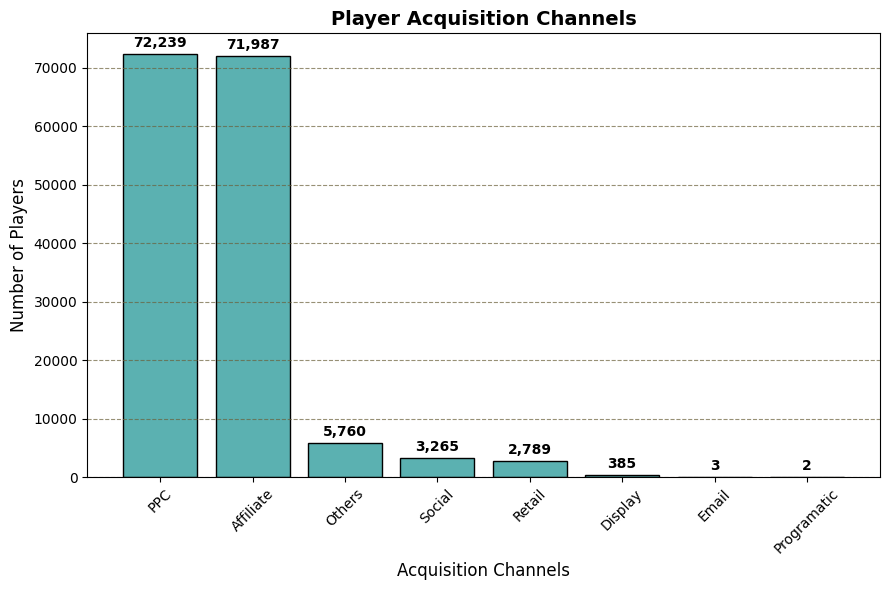

In [68]:
channel_counts = Activity_30_Days['acquisition_channel'].value_counts()
plt.figure(figsize=(9,6))
bars = plt.bar(channel_counts.index, channel_counts.values, color=[ "#5BB1B1"], edgecolor="black")

for i, bar in enumerate(bars):
    height = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/2, height + (0.01*max(channel_counts.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.title("Player Acquisition Channels", fontsize=14, fontweight="bold")
plt.xlabel("Acquisition Channels", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7, color= "#6B613B")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Unknown are asigned to those methods which are not mentioned like throgh a friend u got recomended of this game and may be just clicked and tried to play this game or anything else. 

In [69]:
registrations = df2[['Src_Player_Id', 'acquisition_channel']].drop_duplicates()
first_deposit = df3_no_Nulls[['Src_Player_Id']]
first_bet = df4_No_Nulls[['Src_Player_Id']]
active_30days = Activity_30_Days[['Src_Player_Id']].drop_duplicates()

In [70]:
funnel_acq = registrations.copy()
funnel_acq['First_Deposit'] = funnel_acq['Src_Player_Id'].isin(first_deposit['Src_Player_Id'])
funnel_acq['First_Bet'] = funnel_acq['Src_Player_Id'].isin(first_bet['Src_Player_Id'])
funnel_acq['Active_30d'] = funnel_acq['Src_Player_Id'].isin(active_30days['Src_Player_Id'])

In [71]:
funnel_by_acquistion_Channels = funnel_acq.groupby('acquisition_channel').agg(Registrations=('Src_Player_Id', 'count'), First_Depositors=('First_Deposit', 'sum'),
                                                                              First_Bettors=('First_Bet', 'sum'), active_30days=('Active_30d', 'sum')).reset_index()


funnel_by_acquistion_Channels['Deposit_Conversion'] = (funnel_by_acquistion_Channels['First_Depositors'] / funnel_by_acquistion_Channels['Registrations'] * 100).round(2)
funnel_by_acquistion_Channels['Beting_Conversion'] = (funnel_by_acquistion_Channels['First_Bettors'] / funnel_by_acquistion_Channels['First_Depositors'] * 100).round(2)
funnel_by_acquistion_Channels['Active_30days_Conversion'] = (funnel_by_acquistion_Channels['active_30days'] / funnel_by_acquistion_Channels['First_Bettors'] * 100).round(2)

In [72]:
funnel_by_acquistion_Channels['Largest_Dropoff'] = funnel_by_acquistion_Channels[['Deposit_Conversion','Beting_Conversion','Active_30days_Conversion']].idxmin(axis=1)

In [73]:
funnel_by_acquistion_Channels

,acquisition_channel,Registrations,First_Depositors,First_Bettors,active_30days,Deposit_Conversion,Beting_Conversion,Active_30days_Conversion,Largest_Dropoff
0,Affiliate,98324,25593,54536,52520,26.03,213.09,96.30,Deposit_Conversion
1,Content,1,0,0,0,0.00,NaN,NaN,Deposit_Conversion
2,Display,491,231,238,216,47.05,103.03,90.76,Deposit_Conversion
3,Email,2,2,2,2,100.00,100.00,100.00,Deposit_Conversion
4,Others,5288,3414,3440,2896,64.56,100.76,84.19,Deposit_Conversion
5,PPC,82961,42407,43258,39791,51.12,102.01,91.99,Deposit_Conversion
6,Programatic,8,2,2,1,25.00,100.00,50.00,Deposit_Conversion
7,Retail,3690,1837,1864,1449,49.78,101.47,77.74,Deposit_Conversion
8,Social,10514,2104,2351,2276,20.01,111.74,96.81,Deposit_Conversion


### The largest drop-off occurs at the deposit stage across all acquisition channels, especially for Social (20%), Affiliate (26%), and Programmatic (25%), indicating weak monetization despite registrations. Stronger performers like PPC (51%) and Retail (50%) suggest these channels bring more committed users.

### Converting Funnel by Acquistion Channels into excel

In [74]:
with pd.ExcelWriter("Funnel_Analysis.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    funnel_by_acquistion_Channels.to_excel(writer, sheet_name="funnel_by_acquistion_Channels", index=False)

In [75]:
df2['Signup_Date'].describe()

count                           292785
mean     2020-04-19 03:50:26.724425984
min                2019-01-01 00:39:26
25%                2019-09-17 12:26:23
50%                2020-04-11 10:55:41
75%                2020-12-13 10:41:21
max                2021-07-13 00:53:37
Name: Signup_Date, dtype: object

In [76]:
df2

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,12584958,2019-02-23 17:24:49,NaN,999999,M,1991-08-05,N
1,12356925,2019-01-07 15:57:11,NaN,999999,M,1993-09-09,N
2,12500831,2019-02-10 08:31:13,NaN,999999,M,1971-10-15,N
3,12660009,2019-03-12 09:42:53,NaN,999999,M,2000-12-15,N
4,12447120,2019-01-28 09:53:42,NaN,999999,M,1994-03-07,N
...,...,...,...,...,...,...,...
292780,18898864,2021-01-26 12:05:22,Affiliate,130850,F,1993-10-17,N
292781,19575899,2021-03-19 22:24:53,Affiliate,130850,M,1988-11-20,N
292782,20345090,2021-05-27 10:11:50,Affiliate,130850,M,1982-06-11,N
292783,19360675,2021-03-03 00:01:49,Affiliate,130850,F,2000-06-16,N


In [ ]:
df2['Months'] = pd.to_datetime(df2['Signup_Date']).dt.to_period('M')  #  2020-05, 2020-06, df2 = player Details dataset

In [78]:
registrations = df2[['Src_Player_Id', 'Months']].drop_duplicates()


registrations['First_Deposit'] = registrations['Src_Player_Id'].isin(df3_no_Nulls['Src_Player_Id'])
registrations['First_Bet'] = registrations['Src_Player_Id'].isin(df4_No_Nulls['Src_Player_Id'])
registrations['Active_30d'] = registrations['Src_Player_Id'].isin(Activity_30_Days['Src_Player_Id'])

In [79]:
funnel_Months = registrations.groupby('Months').agg( Registrations=('Src_Player_Id', 'count'), First_Depositors=('First_Deposit', 'sum'),
                                                     First_Bettors=('First_Bet', 'sum'), 
                                                     Active_30d=('Active_30d', 'sum')).reset_index()


funnel_Months['Deposit_Conversion'] = (funnel_Months['First_Depositors'] / funnel_Months['Registrations'] * 100).round(2)
funnel_Months['Betting_Conversion'] = (funnel_Months['First_Bettors'] / funnel_Months['First_Depositors'] * 100).round(2)
funnel_Months['Active_30days_Conversion'] = (funnel_Months['Active_30d'] / funnel_Months['First_Bettors'] * 100).round(2)


In [80]:
funnel_Months

,Months,Registrations,First_Depositors,First_Bettors,Active_30d,Deposit_Conversion,Betting_Conversion,Active_30days_Conversion
0,2019-01,10708,4093,5660,5524,38.22,138.28,97.60
1,2019-02,10342,4061,5244,5019,39.27,129.13,95.71
2,2019-03,9017,3845,4517,4094,42.64,117.48,90.64
3,2019-04,9106,4071,4910,4485,44.71,120.61,91.34
4,2019-05,8786,3927,4691,4325,44.70,119.46,92.20
5,2019-06,5991,2555,3289,3195,42.65,128.73,97.14
6,2019-07,6070,2813,3480,3172,46.34,123.71,91.15
7,2019-08,7575,3496,4494,4123,46.15,128.55,91.74
8,2019-09,9604,4069,5017,4667,42.37,123.30,93.02
9,2019-10,9786,4709,5580,4990,48.12,118.50,89.43


### Converting Funnel by Months into Excel for better Analysis

In [81]:
with pd.ExcelWriter("Funnel_Analysis.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    funnel_Months.to_excel(writer, sheet_name="funnel_months", index=False)

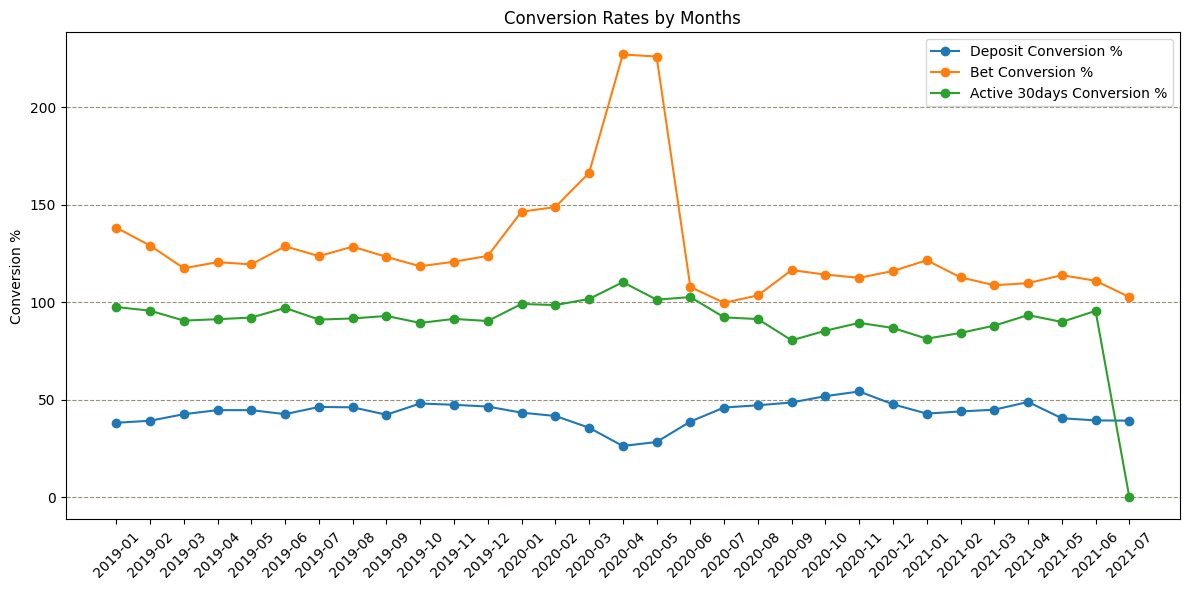

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(funnel_Months['Months'].astype(str), funnel_Months['Deposit_Conversion'], marker='o', label="Deposit Conversion %")
plt.plot(funnel_Months['Months'].astype(str), funnel_Months['Betting_Conversion'], marker='o', label="Bet Conversion %")
plt.plot(funnel_Months['Months'].astype(str), funnel_Months['Active_30days_Conversion'], marker='o', label="Active 30days Conversion %")

plt.xticks(rotation=45)
plt.title("Conversion Rates by Months")
plt.ylabel("Conversion %")
plt.grid(axis="y", linestyle="--", alpha=0.7, color= "#6B613B")
plt.legend()
plt.tight_layout()
plt.show()

### The biggest friction remains at the deposit stage (40–50% conversion), while bettors and actives remain highly engaged once past that stage.

### The March–April 2020 spike in bet conversion is an outlier worth investigating (likely tied to promotions, system changes, or COVID-19 impact).

In [83]:
Activity_30_Days

,Src_Player_Id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN,Days_Since_Signup
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000,2020-08-06,PPC,129135,F,1996-07-16,N,26
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000,2021-02-02,NaN,999999,M,1993-02-03,N,27
7,16763464,2020-08-31,IVG,IVG,1,20.00,0.00,20.0000,16.800000,2020-08-22,Affiliate,126150,F,1973-10-01,N,10
11,16277359,2020-07-31,eGaming,Table Games,2,34.00,9.00,25.0000,21.000000,2020-07-07,NaN,999999,F,1991-01-14,N,25
15,17605880,2020-10-31,eGaming,Table Games,1,56.50,18.00,38.5000,32.340000,2020-10-25,NaN,999999,M,2002-07-12,N,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860217,12760753,2019-04-30,SportsBook,Prematch,17,757.00,0.00,757.0000,635.880000,2019-04-01,PPC,129135,M,1997-05-04,N,30
860218,17986689,2020-11-30,eGaming,Non Table Games,3,310.00,280.30,29.0862,24.432408,2020-11-21,Affiliate,125200,M,1999-07-07,N,10
860222,19521433,2021-03-31,eGaming,Non Table Games,10,33406.75,31507.15,1899.6000,1595.664000,2021-03-15,Affiliate,138202,M,1977-03-13,N,17
860223,15220360,2020-03-31,eGaming,Non Table Games,1,111.00,86.00,25.0000,21.000000,2020-03-23,Affiliate,130850,M,1991-08-13,N,9


# Retention Analysis

## Cohort Analysis of Players that were active With in First 30 days of Registration
### here we will count the active days of players in Span of 30 days after  #Registration and group it in bins for better understanding

In [84]:
Activity_30_Days[['Src_Player_Id', 'ActivityMonth', 'Product', 'SubProduct']].duplicated().value_counts()

False    243317
Name: count, dtype: int64

### Activity_30_Days is unique as per these values : 'Src_Player_Id', 'ActivityMonth', 'Product', 'SubProduct' and we will sort them so we could see a pattern here.

In [85]:
Activity_30_Days_Sorted = (Activity_30_Days.sort_values(by=['Src_Player_Id', 'ActivityMonth', 'Product', 'SubProduct']).reset_index(drop=True))

In [86]:
Activity_30_Days_Sorted


,Src_Player_Id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN,Days_Since_Signup
0,12333354,2019-01-31,SportsBook,Livebook,2,65.0,43.30,21.7000,18.228000,2019-01-02,NaN,999999,M,1992-07-23,N,30
1,12333354,2019-01-31,SportsBook,Prematch,3,25.0,0.00,25.0000,21.000000,2019-01-02,NaN,999999,M,1992-07-23,N,30
2,12333354,2019-01-31,eGaming,Non Table Games,2,513.7,355.40,157.3779,132.197436,2019-01-02,NaN,999999,M,1992-07-23,N,30
3,12333415,2019-01-31,eGaming,Non Table Games,1,102.8,82.85,18.9402,15.909768,2019-01-02,Affiliate,130850,M,1995-06-18,N,30
4,12333625,2019-01-31,SportsBook,Livebook,22,996.0,805.07,190.9300,160.381200,2019-01-02,Affiliate,125202,M,1975-09-17,N,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243312,20702081,2021-06-30,eGaming,Non Table Games,1,0.0,0.00,0.0000,0.000000,2021-06-30,PPC,129135,M,1976-09-02,N,1
243313,20702367,2021-06-30,Lotto,Lotto,1,7.0,0.00,0.0000,0.000000,2021-06-30,Affiliate,125200,F,1996-11-05,N,1
243314,20702367,2021-06-30,eGaming,Non Table Games,1,0.0,0.00,0.0000,0.000000,2021-06-30,Affiliate,125200,F,1996-11-05,N,1
243315,20703294,2021-06-30,eGaming,Non Table Games,1,427.2,358.60,68.6000,57.624000,2021-06-30,NaN,999999,M,1994-08-20,N,1


###  We will Take Maximum of Active player Days of the player as a player Might play 2 games at 1st day then  it shows activity for both games at that day 
### and 2 same games at Another day then  it shows activity for both games at 2nd day 
### and  (1 of 2) games at the 3rd day so this shows that player was active in 3rd day and it shows its activity for 3rd day but only for that game
### so overall player was playing for overall 3 days
## Hence We will take #Maximum ActivePlayerDays Days with in Activity_30_Days_Sorted dataset.

In [87]:
player_active_days = (Activity_30_Days_Sorted.groupby('Src_Player_Id', as_index=False)['ActivePlayerDays'].max())

player_active_days.head(10)

,Src_Player_Id,ActivePlayerDays
0,12333354,3
1,12333415,1
2,12333625,22
3,12333629,7
4,12333671,21
5,12333679,6
6,12333682,1
7,12333688,7
8,12333754,1
9,12333764,1


In [88]:
bins = [0, 2, 5, 10, 20, 30]
labels = ['0-2 days', '3-5 days', '6-10 days', '11-20 days', '21-30 days']

player_active_days['Engagement_Cohort'] = pd.cut(player_active_days['ActivePlayerDays'], bins=bins, labels=labels, right=True)

In [89]:
player_active_days

,Src_Player_Id,ActivePlayerDays,Engagement_Cohort
0,12333354,3,3-5 days
1,12333415,1,0-2 days
2,12333625,22,21-30 days
3,12333629,7,6-10 days
4,12333671,21,21-30 days
...,...,...,...
146148,20701685,1,0-2 days
146149,20702081,1,0-2 days
146150,20702367,1,0-2 days
146151,20703294,1,0-2 days


### Converting Active Days Distribution with first 30 days since signup into excel

In [90]:
with pd.ExcelWriter("Funnel_Analysis.xlsx", mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    player_active_days.to_excel(writer, sheet_name="Days Active(30 Days)", index=False)

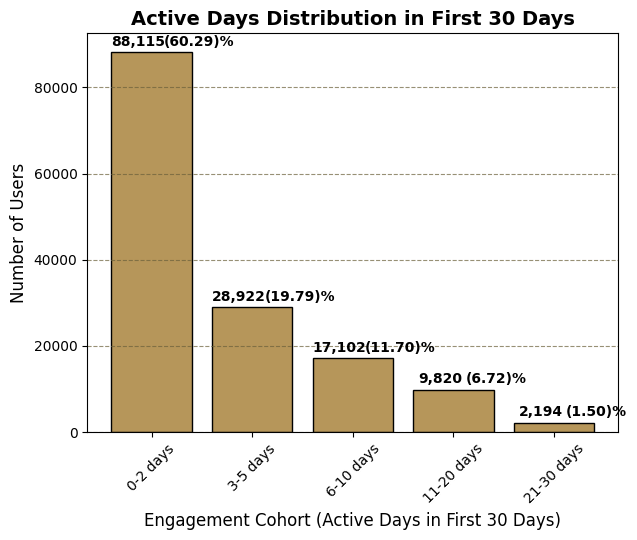

In [91]:
cohort_counts = player_active_days['Engagement_Cohort'].value_counts().sort_index()
percentages = (cohort_counts / cohort_counts.sum()) * 100

plt.figure(figsize=(6.5,5.5))
bars = plt.bar(cohort_counts.index, cohort_counts.values, color=[ "#B6965A"], edgecolor="black")
for i, bar in enumerate(bars):
    height = bar.get_height()

    plt.text(bar.get_x() + bar.get_width()/3, height + (0.01*max(cohort_counts.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=10, fontweight="bold")

    plt.text(bar.get_x() + bar.get_width()/2 + 0.12, height + (0.01*max(cohort_counts.values)),
             f"({percentages.values[i]:.2f})%", ha='left', va='bottom',
             fontsize=10, fontweight="bold", color="black")


plt.title("Active Days Distribution in First 30 Days", fontsize=14, fontweight="bold")
plt.xlabel("Engagement Cohort (Active Days in First 30 Days)", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7, color= "#6B613B")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The 0–2 day cohort contributes the most to total deposits, primarily because of their large size and initial deposit behavior right after registration.

### However, the highest-value customers on a per-user basis come from the 6–10, 11 - 20 , 21-30 days cohorts, since sustained engagement strongly correlates with repeat deposits and betting activity.

In [92]:
percentages

Engagement_Cohort
0-2 days      60.289560
3-5 days      19.788851
6-10 days     11.701436
11-20 days     6.718986
21-30 days     1.501167
Name: count, dtype: float64

In [93]:
cohort_deposits = player_active_days.merge(df3_no_Nulls[['Src_Player_Id','First_Deposit_Amount']], on='Src_Player_Id', how='left')
cohort_summary = cohort_deposits.groupby('Engagement_Cohort')['First_Deposit_Amount'].sum().reset_index()
cohort_summary = cohort_summary.sort_values(by='First_Deposit_Amount', ascending=False)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_19216\3982250472.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [94]:
cohort_summary

,Engagement_Cohort,First_Deposit_Amount
0,0-2 days,5937605.08
1,3-5 days,3954212.63
2,6-10 days,2126142.83
3,11-20 days,1174307.95
4,21-30 days,262645.04


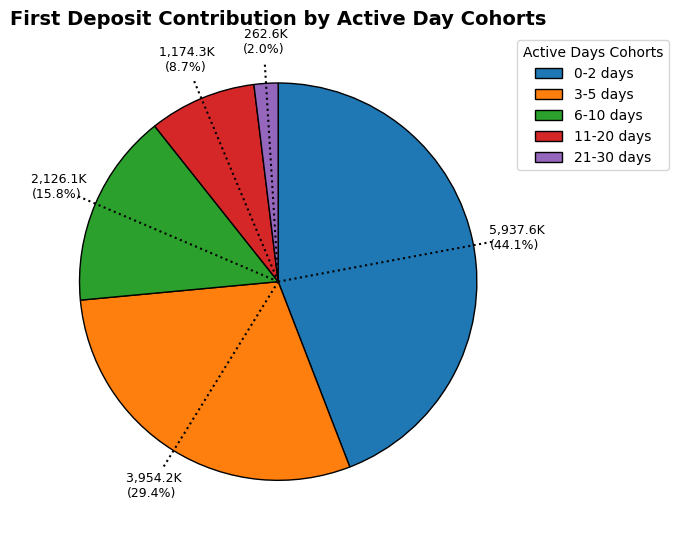

In [95]:
labels = cohort_summary['Engagement_Cohort']
sizes = cohort_summary['First_Deposit_Amount']
plt.figure(figsize=(6.5,5.5))
wedges, texts, autotexts = plt.pie(sizes,startangle=90,counterclock=False,wedgeprops={"edgecolor": "black"}, autopct='%1.1f%%',    pctdistance=1.2,     labeldistance=None  )

for i, a in enumerate(autotexts):
    value_in_k = sizes.iloc[i] / 1000  # converting to thousands
    a.set_text(f" {value_in_k:,.1f}K\n({sizes.iloc[i]/sizes.sum():.1%})")
    a.set_color("black")
    a.set_fontsize(9)

for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1)/2
    x = 1.1 * np.cos(np.deg2rad(ang))
    y = 1.1 * np.sin(np.deg2rad(ang))
    plt.plot([0, x], [0, y], linestyle="dotted", color="black")
    autotexts[i].set_position((x*1.1, y*1.1))


plt.legend(wedges, labels, title="Active Days Cohorts", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("First Deposit Contribution by Active Day Cohorts", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### The 1–2 day cohort dominates total deposits due to large user volume and strong onboarding incentives.

### However, longer engagement cohorts (6–30 days) are disproportionately valuable per user, indicating retention strategies could shift overall profitability.

In [96]:
df4_No_Nulls.info() ## First bet Cleaned Dataset with no Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159166 entries, 0 to 159165
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Src_Player_Id                   159166 non-null  object        
 1   System_First_Bet_Datetime       159166 non-null  datetime64[ns]
 2   System_First_BetSlip_Amt        159166 non-null  float64       
 3   System_First_Bet_Product_Group  159166 non-null  object        
 4   System_First_Bet_Product        159166 non-null  object        
 5   System_First_Bet_Channel        159166 non-null  object        
 6   System_First_Bet_Platform       159166 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.5+ MB


In [97]:
df3_no_Nulls.info()  ## First deposit Cleaned Dataset with no Nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127261 entries, 0 to 127260
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Src_Player_Id          127261 non-null  object        
 1   First_Deposit_Date     127261 non-null  datetime64[ns]
 2   First_Deposit_Channel  127261 non-null  object        
 3   First_Deposit_Method   127261 non-null  object        
 4   First_Deposit_Amount   127261 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 4.9+ MB


# Gap Days Analysis between First Deposit date and First Betting Date

In [98]:
deposit_bet = df3_no_Nulls[['Src_Player_Id','First_Deposit_Date']].merge( df4_No_Nulls[['Src_Player_Id','System_First_Bet_Datetime']], on='Src_Player_Id', how='inner')
deposit_bet['Gap_Days'] = (deposit_bet['System_First_Bet_Datetime'] - deposit_bet['First_Deposit_Date']).dt.days

In [99]:
deposit_bet['Gap_Days'].describe()

count    125663.000000
mean         -3.040505
std          34.031473
min        -834.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         728.000000
Name: Gap_Days, dtype: float64

## ----------------------------------------

#### Here When Gap Day are positive(  1 , 2 , 34 , 50 , 100, etc) it means that the Player has betted #later after the First Deposit Date.

#### And When Gap Day are neagtive( -1 , -2 , -12, -97, etc) it means that the Player has betted #First then Deposited the Amount at  a later date and it indcates how many days after the betting they have deposited.

#### When the Gap Day is Zero it Means Player betted and deposited on very same day

## ----------------------------------------

In [100]:
deposit_bet

,Src_Player_Id,First_Deposit_Date,System_First_Bet_Datetime,Gap_Days
0,20424535,2021-06-05 12:59:49,2021-06-05 16:12:36.032,0
1,20538009,2021-06-16 17:59:20,2021-06-16 21:07:51.802,0
2,20528494,2021-06-15 20:46:26,2021-06-15 23:46:58.559,0
3,14918789,2020-02-07 17:35:06,2020-02-07 19:35:18.267,0
4,12547287,2020-12-12 21:01:04,2020-12-12 21:06:34.000,0
...,...,...,...,...
125658,18792083,2021-01-17 14:52:26,2021-01-17 15:40:08.000,0
125659,20698616,2021-06-30 14:35:08,2021-06-30 17:37:15.330,0
125660,12835955,2019-04-18 18:53:14,2019-04-18 19:04:42.000,0
125661,20399631,2021-06-17 09:11:35,2021-06-07 23:13:18.000,-10


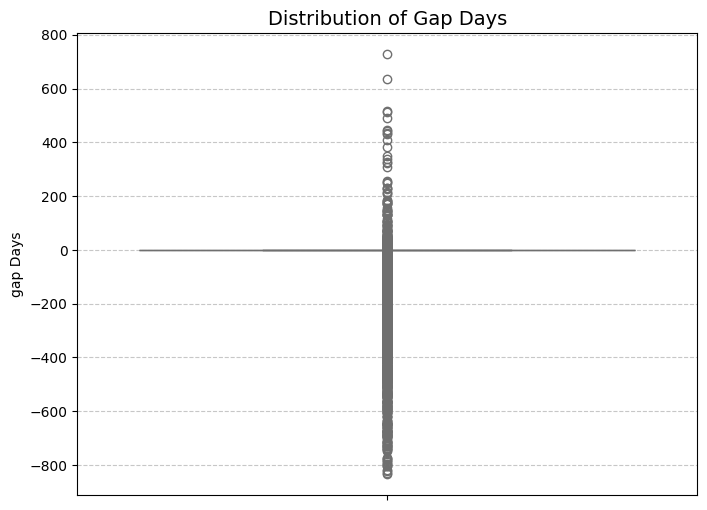

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(y=deposit_bet['Gap_Days'], color="skyblue")

plt.title("Distribution of Gap Days", fontsize=14)
plt.ylabel("gap Days")
plt.xlabel("") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Mean, Median, 75th Percentile, and Max Gaps Between First Deposit date and First Bet date

In [102]:
deposit_bet[deposit_bet['Gap_Days']<0]['Gap_Days'].describe()

count    4835.000000
mean      -85.122441
std       148.755665
min      -834.000000
25%       -97.000000
50%       -12.000000
75%        -2.000000
max        -1.000000
Name: Gap_Days, dtype: float64

In [103]:
deposit_bet[deposit_bet['Gap_Days']>=0]['Gap_Days'].describe()

count    120828.000000
mean          0.244049
std           6.228452
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         728.000000
Name: Gap_Days, dtype: float64

In [104]:
print(deposit_bet[deposit_bet['Gap_Days']<0].shape)
print(deposit_bet[deposit_bet['Gap_Days']>=0].shape)

(4835, 4)
(120828, 4)


In [105]:
positive_gap = deposit_bet[deposit_bet['Gap_Days'] >= 0].copy()
negative_gap = deposit_bet[deposit_bet['Gap_Days'] < 0].copy()

# Positive Gap Days(Deposition First then Betting)

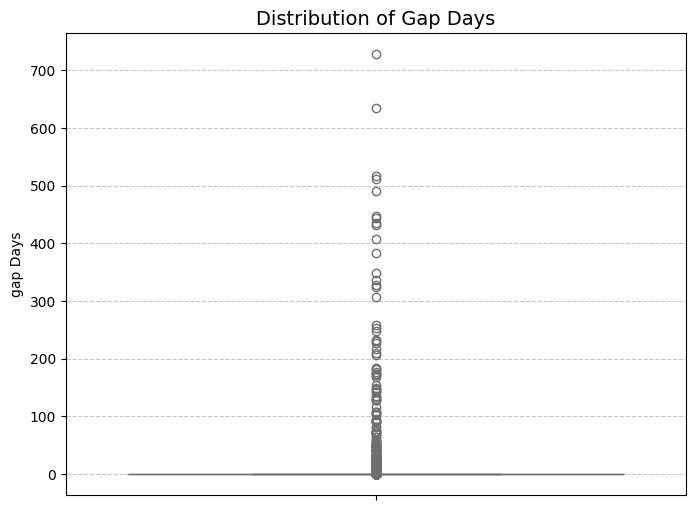

In [106]:
plt.figure(figsize=(8,6))
sns.boxplot(y=positive_gap['Gap_Days'], color="skyblue")

plt.title("Distribution of Gap Days", fontsize=14)
plt.ylabel("gap Days")
plt.xlabel("") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## The Above Chart helps us in understanding the Overall Gap days distribution which helps in #Better #Bin Distribution

In [107]:
bins_pos = [0, 2, 7, 30, 90, 150 , positive_gap['Gap_Days'].max()]
labels_pos = ["0-2 days", "3-7 days", "8-30 days", "31-90 days", "91-150days" , "150+"]
positive_gap['Gap_Bin'] = pd.cut(positive_gap['Gap_Days'], bins=bins_pos, labels=labels_pos, include_lowest=True)

In [108]:
positive_gap['Gap_Bin'].value_counts()

Gap_Bin
0-2 days      119429
3-7 days         855
8-30 days        437
31-90 days        52
150+              34
91-150days        21
Name: count, dtype: int64

### here the Player has betted #later after the First Deposit Date or maybe even same day.

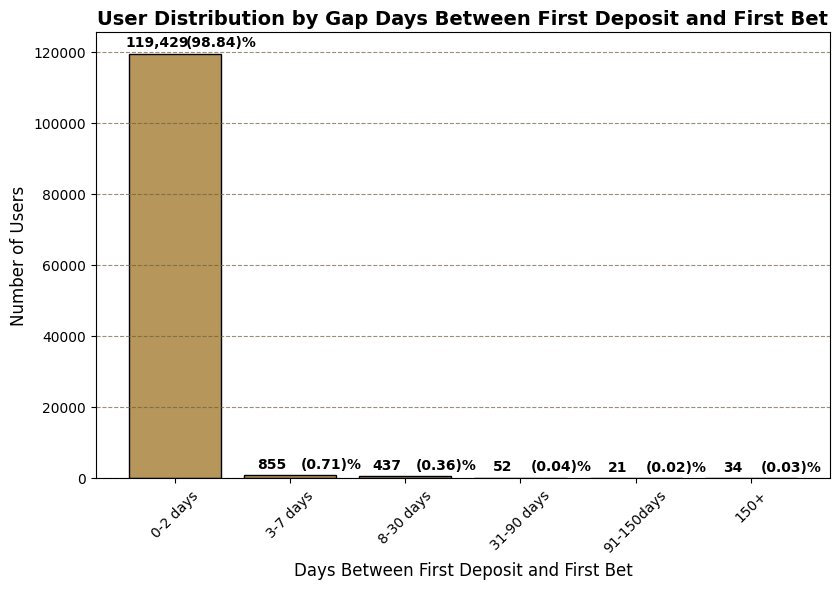

In [109]:
gap_bin_summary = positive_gap['Gap_Bin'].value_counts(normalize=False).sort_index()
gap_bin_percent = positive_gap['Gap_Bin'].value_counts(normalize=True).sort_index()*100

plt.figure(figsize=(8.5,6))
bars = plt.bar(gap_bin_summary.index, gap_bin_summary.values, 
               color=[ "#B6965A"], 
               edgecolor="black")

for i, bar in enumerate(bars):
    height = bar.get_height()

    
    plt.text(bar.get_x() + bar.get_width()/3.3, height + (0.01*max(gap_bin_summary.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=10, fontweight="bold")

    
    plt.text(bar.get_x() + bar.get_width()/2 + 0.09, height + (0.01*max(gap_bin_summary.values)),
             f"({gap_bin_percent.values[i]:.2f})%", ha='left', va='bottom',
             fontsize=10, fontweight="bold", color="black")


plt.title("User Distribution by Gap Days Between First Deposit and First Bet", fontsize=14, fontweight="bold")
plt.xlabel("Days Between First Deposit and First Bet", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)


plt.grid(axis="y", linestyle="--", alpha=0.7, color= "#6B613B")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Engagement outcomes are dominated by fast converters (0–2 days) — they form the bulk of activity and revenue.

### However, the rare long-gap users, though fewer, could provide higher lifetime value per user if reactivation strategies (emails, bonuses, reminders) are applied.

# Negative gap Days(First betting then deposited)

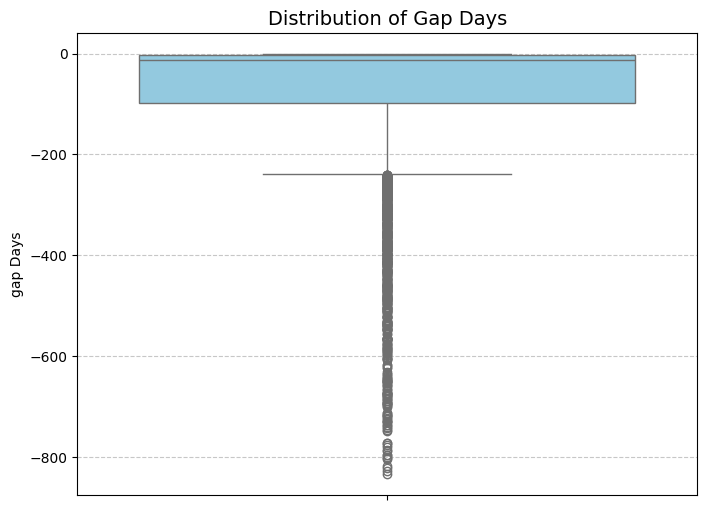

In [110]:
plt.figure(figsize=(8,6))
sns.boxplot(y=negative_gap['Gap_Days'], color="skyblue")

plt.title("Distribution of Gap Days", fontsize=14)
plt.ylabel("gap Days")
plt.xlabel("") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## The Above Chart helps us in understanding the Overall Gap days distribution which helps in #Better #Bin Distribution

In [111]:
deposit_bet[deposit_bet['Gap_Days']<0]['Gap_Days'].describe()

count    4835.000000
mean      -85.122441
std       148.755665
min      -834.000000
25%       -97.000000
50%       -12.000000
75%        -2.000000
max        -1.000000
Name: Gap_Days, dtype: float64

In [112]:
bins_neg = [negative_gap['Gap_Days'].min()   ,-451 ,-201, -91, -31, -8, -3, -1]
labels_neg = [ "<=-451 days ", "-450 to -201 days"   ,"-200 to -91 days", "-90 to -31 days", "-30 to -8 days", "-7 to -3 days", "-2 to -1 days"]
negative_gap['Gap_Bin'] = pd.cut(negative_gap['Gap_Days'], bins=bins_neg, labels=labels_neg, include_lowest=True)

In [113]:
negative_gap['Gap_Bin'].value_counts()

Gap_Bin
-2 to -1 days        1377
-30 to -8 days        836
-7 to -3 days         751
-90 to -31 days       631
-450 to -201 days     517
-200 to -91 days      503
<=-451 days           220
Name: count, dtype: int64

###  Here the Player has betted #First then Deposited the Amount at  a later date as Bonus mounts were given during Registrations which could be used for betting.

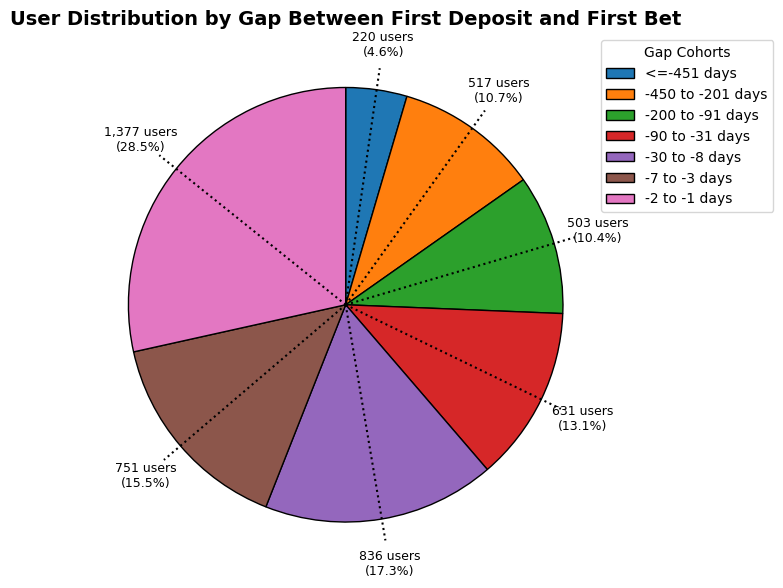

In [114]:
gap_bin_summary = negative_gap['Gap_Bin'].value_counts().sort_index()
labels = gap_bin_summary.index
sizes = gap_bin_summary.values

plt.figure(figsize=(7,6))
wedges, texts, autotexts = plt.pie(sizes, startangle=90,  counterclock=False, wedgeprops={"edgecolor": "black"}, autopct='%1.1f%%', pctdistance=1.2, labeldistance=None)

for i, a in enumerate(autotexts):
    value_in_k = sizes[i] / 1000  
    a.set_text(f"{sizes[i]:,} users\n({sizes[i]/sizes.sum():.1%})")
    a.set_color("black")
    a.set_fontsize(9)

for i, wedge in enumerate(wedges):
    ang = (wedge.theta2 + wedge.theta1)/2
    x = 1.1 * np.cos(np.deg2rad(ang))
    y = 1.1 * np.sin(np.deg2rad(ang))
    plt.plot([0, x], [0, y], linestyle="dotted", color="black")
    autotexts[i].set_position((x*1.1, y*1.1))

plt.legend( wedges, labels, title="Gap Cohorts", loc="upper right",bbox_to_anchor=(1.3, 1))
plt.title("User Distribution by Gap Between First Deposit and First Bet", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### Short gaps ( negative) = high intent, better retention, stronger long-term value.

### Long gaps (positive or negative) = low intent, bonus-driven or delayed reactivations, weak long-term engagement.

### The shape of your distribution is very front-loaded (both for +0–2 days and -1 to -7 days), which is healthy.

In [115]:
df4_No_Nulls['System_First_Bet_Datetime'] = pd.to_datetime(df4_No_Nulls['System_First_Bet_Datetime']) ## df4_No_Nulls = Player first bet  Cleaned Dataset

In [116]:
df3_no_Nulls['First_Deposit_Date'] = pd.to_datetime(df3_no_Nulls['First_Deposit_Date']) ## df3_No_Nulls = Player first Deposit  Cleaned Dataset

# Gap Days Analysis between Registration Date and First Deposit date

In [117]:
reg_deposit = df3_no_Nulls[['Src_Player_Id','First_Deposit_Date']].merge(df2[['Src_Player_Id','Signup_Date']], on='Src_Player_Id', how='inner')

In [118]:
reg_deposit['Gap_Days'] = (reg_deposit['First_Deposit_Date'] - reg_deposit['Signup_Date']).dt.days

In [119]:
reg_deposit['Gap_Days'].describe()

count    127261.000000
mean         23.592224
std          89.948807
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         910.000000
Name: Gap_Days, dtype: float64

In [120]:
reg_deposit

,Src_Player_Id,First_Deposit_Date,Signup_Date,Gap_Days
0,20424535,2021-06-05 12:59:49,2021-06-05 12:53:00,0
1,20538009,2021-06-16 17:59:20,2021-06-16 17:45:02,0
2,16605812,2020-08-08 14:56:53,2020-08-08 14:54:43,0
3,20528494,2021-06-15 20:46:26,2021-06-15 20:44:54,0
4,14918789,2020-02-07 17:35:06,2020-02-07 17:29:49,0
...,...,...,...,...
127256,18792083,2021-01-17 14:52:26,2021-01-17 00:15:07,0
127257,20698616,2021-06-30 14:35:08,2021-06-30 14:33:38,0
127258,12835955,2019-04-18 18:53:14,2019-04-18 18:50:43,0
127259,20399631,2021-06-17 09:11:35,2021-06-02 15:52:35,14


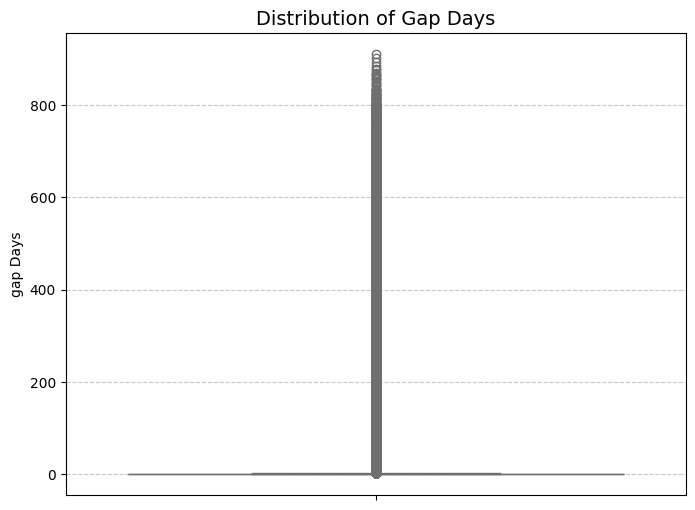

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(y=reg_deposit['Gap_Days'], color="skyblue")

plt.title("Distribution of Gap Days", fontsize=14)
plt.ylabel("gap Days")
plt.xlabel("") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## The Above Chart helps us in understanding the Overall Gap days distribution which helps in #Better #Bin Distribution

In [122]:
bins_reg = [0, 2, 51, 201, 401, 601, 801, reg_deposit['Gap_Days'].max()]
labels_reg = ["0-1 days", "2-50 days", "51-200 days", "201-400 days", "401-600 days", "601-800 days", "801+"]

reg_deposit['Reg_Deposit_Bin'] = pd.cut(reg_deposit['Gap_Days'], bins=bins_reg, labels=labels_reg, include_lowest=True)

reg_bin_summary = reg_deposit['Reg_Deposit_Bin'].value_counts().sort_index()


In [123]:
reg_bin_summary

Reg_Deposit_Bin
0-1 days        102420
2-50 days        14280
51-200 days       4987
201-400 days      3277
401-600 days      1578
601-800 days       666
801+                53
Name: count, dtype: int64

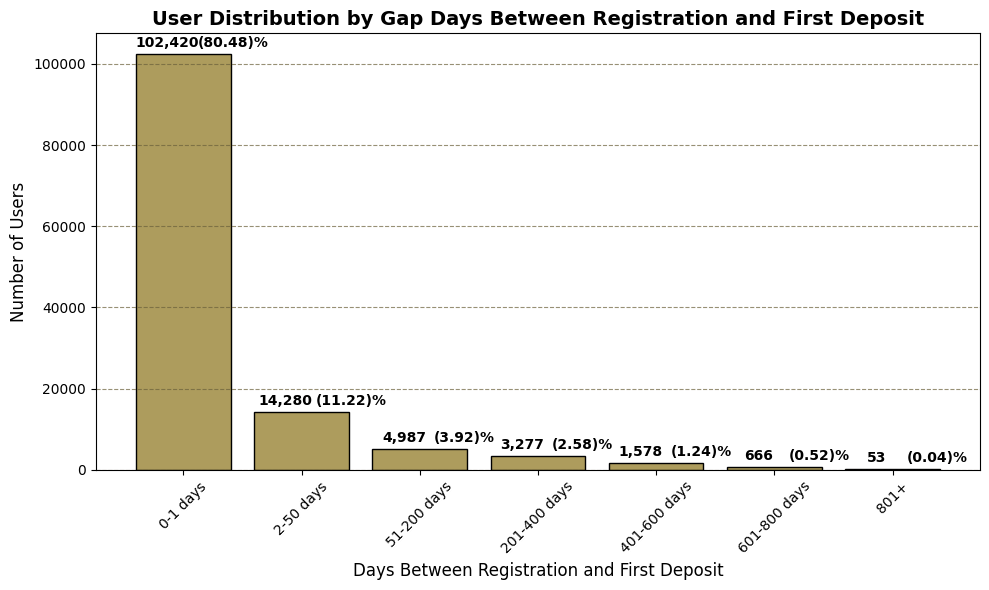

In [124]:
reg_bin_summary = reg_deposit['Reg_Deposit_Bin'].value_counts(normalize=False).sort_index()
reg_bin_percent = reg_deposit['Reg_Deposit_Bin'].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(10,6))
bars = plt.bar(reg_bin_summary.index, reg_bin_summary.values, color=[ "#AD9C5D"], edgecolor="black")

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3, height + (0.01*max(reg_bin_summary.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=10, fontweight="bold")
  
    plt.text(bar.get_x() + bar.get_width()/2 + 0.12, height + (0.01*max(reg_bin_summary.values)),
             f"({reg_bin_percent.values[i]:.2f})%", ha='left', va='bottom',
             fontsize=10, fontweight="bold", color="black")


plt.title("User Distribution by Gap Days Between Registration and First Deposit", fontsize=14, fontweight="bold")
plt.xlabel("Days Between Registration and First Deposit", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7, color= "#6B613B")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Around 80% of users make their first deposit within 1 day of registration, showing strong intent and an efficient onboarding funnel.
### Another ~11% convert within 2–50 days, likely driven by promotions or reminders.


# Player Segmentation

## Top 10% of players by total deposit amount.

In [125]:
player_deposits = df3_no_Nulls.groupby("Src_Player_Id")["First_Deposit_Amount"].sum().reset_index()

threshold = player_deposits["First_Deposit_Amount"].quantile(0.90)

### Quantile(0.9) used for separating top 10 and Bottom 90 Players by their First DEposit Amount.

In [126]:
top_10 = player_deposits[player_deposits["First_Deposit_Amount"] >= threshold]
bottom_90 = player_deposits[player_deposits["First_Deposit_Amount"] < threshold]

In [127]:
top_10.shape

(15830, 2)

In [128]:
top_10.head(10)

,Src_Player_Id,First_Deposit_Amount
1,12329942,1000.0
20,12330443,300.0
23,12330552,500.0
30,12330668,300.0
34,12330758,300.0
42,12330901,500.0
53,12331133,13000.0
57,12331355,500.0
66,12331647,300.0
67,12331675,600.0


In [129]:
bottom_90.shape

(111431, 2)

In [130]:
bottom_90.head(10)

,Src_Player_Id,First_Deposit_Amount
0,12329630,25.0
2,12329956,80.0
3,12330018,250.0
4,12330032,30.0
5,12330040,20.0
6,12330059,50.0
7,12330083,80.0
8,12330104,50.0
9,12330158,25.0
10,12330222,80.0


In [131]:
total_deposits = player_deposits["First_Deposit_Amount"].sum()
top_10_share = top_10["First_Deposit_Amount"].sum() / total_deposits * 100
bottom_90_share = bottom_90["First_Deposit_Amount"].sum() / total_deposits * 100

print(f"Top 10% Players Deposit Share: {top_10_share:.2f}%")
print(f"Bottom 90% Players Deposit Share: {bottom_90_share:.2f}%")

Top 10% Players Deposit Share: 54.55%
Bottom 90% Players Deposit Share: 45.45%


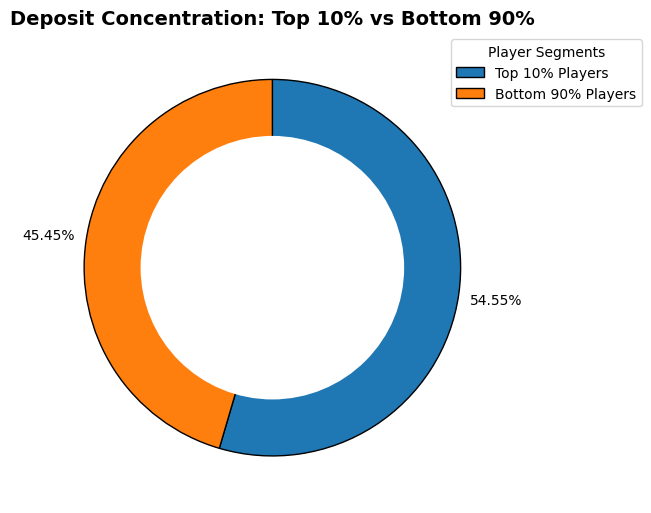

In [132]:
labels = ["Top 10% Players", "Bottom 90% Players"]
sizes = [top_10_share, bottom_90_share]

plt.figure(figsize=(6,5.5))
wedges, texts, autotexts = plt.pie(sizes, startangle=90, counterclock=False, wedgeprops={"edgecolor": "black"},  autopct='%1.1f%%', pctdistance=1.2, labeldistance=None)

for i, a in enumerate(autotexts):
    a.set_text(f"{sizes[i]:.2f}%")
    a.set_color("black")
    a.set_fontsize(10)

plt.legend(wedges, labels,title="Player Segments", loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("Deposit Concentration: Top 10% vs Bottom 90%", fontsize=14, fontweight="bold")


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

### Deposits are highly concentrated, with the top 10% of players contributing over half of total deposits (54.55%). This indicates strong dependence on a small high-value segment, highlighting both an opportunity (VIP engagement) & a risk

In [133]:
top_10['First_Deposit_Amount'].describe()

count    15830.000000
mean       537.658736
std        382.339819
min        300.000000
25%        400.000000
50%        500.000000
75%        511.000000
max      13000.000000
Name: First_Deposit_Amount, dtype: float64

# User Distribution of First Deposit Amounts

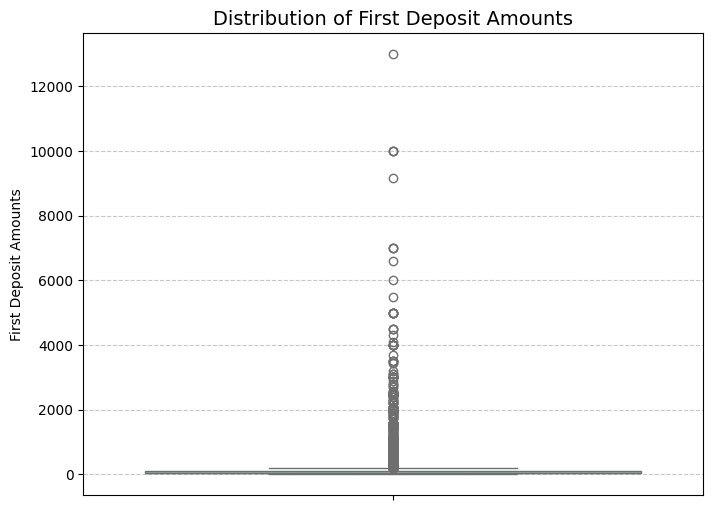

In [134]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df3_no_Nulls['First_Deposit_Amount'], color="skyblue")

plt.title("Distribution of First Deposit Amounts", fontsize=14)
plt.ylabel("First Deposit Amounts")
plt.xlabel("") 
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## The Above Chart helps us in understanding the Overall Gap days distribution which helps in #Better #Bin Distribution

In [135]:
df3_no_Nulls['First_Deposit_Amount'].describe()

count    127261.000000
mean        122.604902
std         211.805569
min          10.000000
25%          30.000000
50%          50.000000
75%         100.000000
max       13000.000000
Name: First_Deposit_Amount, dtype: float64

In [136]:
tf = df3_no_Nulls.copy()

In [137]:
bins = [10, 20, 40, 80, 120, 200 , 500, 1000, tf['First_Deposit_Amount'].max()]
labels = ["10-19", "20-40", "41-80", "81-120", "121-200", "201-500",  "501-1k", '1k+'] 

tf["First_Deposit_Bin"] = pd.cut(tf["First_Deposit_Amount"], bins=bins, labels=labels, include_lowest=True)


deposit_bins = tf["First_Deposit_Bin"].value_counts().sort_index()

In [138]:
deposit_bins

First_Deposit_Bin
10-19       7680
20-40      37825
41-80      38819
81-120     15314
121-200    10753
201-500    12578
501-1k      3871
1k+          421
Name: count, dtype: int64

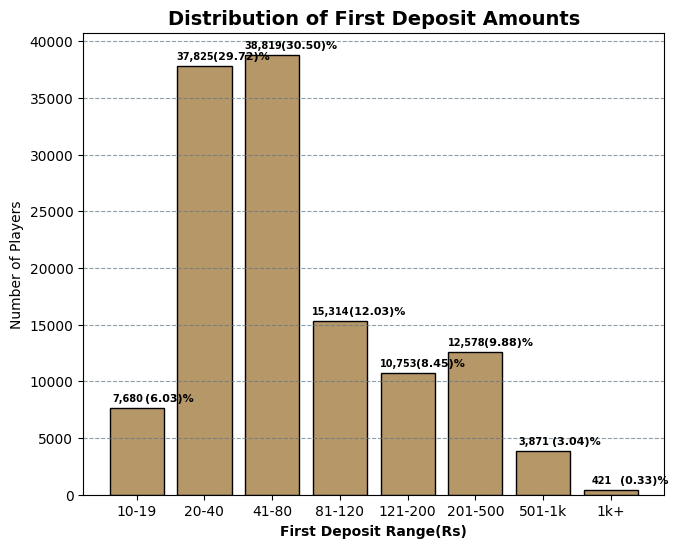

In [139]:
deposit_bins = tf["First_Deposit_Bin"].value_counts(normalize=False).sort_index()
deposit_bins_percent = tf["First_Deposit_Bin"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(7.5,6))
bars = plt.bar(deposit_bins.index, deposit_bins.values, 
               color=[ "#B69768"], 
               edgecolor="black")

for i, bar in enumerate(bars):
    height = bar.get_height()

    
    plt.text(bar.get_x() + bar.get_width()/3, height + (0.01*max(deposit_bins.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=7, fontweight="bold")

   
    plt.text(bar.get_x() + bar.get_width()/2 + 0.13, height + (0.01*max(deposit_bins.values)),
             f"({deposit_bins_percent.values[i]:.2f})%", ha='left', va='bottom',
             fontsize=8, fontweight="bold", color="black")

plt.title("Distribution of First Deposit Amounts", fontsize=14, fontweight="bold")
plt.xlabel("First Deposit Range(Rs)", fontweight="bold")
plt.ylabel("Number of Players")
plt.grid(axis="y", linestyle="--", alpha=0.7, color = "#617581" )
plt.show()

### The 20–40 (37,825 players) and 41–80 (38,819 players) bins dominate, together accounting for the majority of first deposits.
### Very few users fall into the 1k+ segment (421 players), indicating high deposits are rare.

## Why clustering happens in datasets like this:

### 1. Psychological thresholds – Players often choose small numbers (e.g.20, 50, etc)
### 2. Marketing & bonuses – Many platforms design welcome offers like “Deposit ₹20 get ₹20 bonus” or “Deposit ₹50 to unlock free spins”
### 3. Risk management – Most new players prefer to start small, testing the platform with modest deposits before committing larger sums.



In [140]:
df5[df5['Gross_Win']<0].describe()

,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
count,111877.000000,1.118770e+05,1.118770e+05,111877.000000,111877.000000
mean,8.050180,6.532840e+03,7.299286e+03,-770.969903,-647.624210
std,8.022237,5.978178e+04,6.243635e+04,5594.685277,4699.543585
min,1.000000,0.000000e+00,0.000000e+00,-874294.300000,-734407.212000
25%,2.000000,7.800000e+01,1.350000e+02,-442.650000,-371.868000
50%,5.000000,3.963000e+02,6.138600e+02,-108.900000,-91.476000
75%,11.000000,2.128000e+03,2.856910e+03,-23.950000,-20.109600
max,31.000000,7.139496e+06,7.488657e+06,-0.004770,13.992000


# Can first deposit amount indicate anything about a customer’s profitability? lets see

### Gross_Win	= Bet amount - Win Amount [Positive Gross Win means business has made money]
### if Gross_Win comes out to be Negative  then Customer has made Profit.

In [141]:
df5[df5['Gross_Win']>0].describe()

,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
count,657438.000000,6.574380e+05,6.574380e+05,657438.000000,657438.000000
mean,5.838222,3.295464e+03,2.961432e+03,332.261320,279.103759
std,7.179591,3.193917e+04,3.080739e+04,1745.372437,1466.144335
min,1.000000,0.000000e+00,-1.834000e+04,0.000500,-49.539200
25%,1.000000,2.800000e+01,0.000000e+00,18.000000,15.120000
50%,3.000000,1.295000e+02,3.468000e+01,52.950000,44.494800
75%,7.000000,7.893300e+02,4.999000e+02,200.900000,168.756000
max,31.000000,7.358337e+06,7.302310e+06,303359.000000,254821.560000


In [142]:
df5[df5['Gross_Win']<0].describe()

,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
count,111877.000000,1.118770e+05,1.118770e+05,111877.000000,111877.000000
mean,8.050180,6.532840e+03,7.299286e+03,-770.969903,-647.624210
std,8.022237,5.978178e+04,6.243635e+04,5594.685277,4699.543585
min,1.000000,0.000000e+00,0.000000e+00,-874294.300000,-734407.212000
25%,2.000000,7.800000e+01,1.350000e+02,-442.650000,-371.868000
50%,5.000000,3.963000e+02,6.138600e+02,-108.900000,-91.476000
75%,11.000000,2.128000e+03,2.856910e+03,-23.950000,-20.109600
max,31.000000,7.139496e+06,7.488657e+06,-0.004770,13.992000


In [143]:
df1 = df1.rename(columns={'Src_PLAYER_ID' : 'Src_Player_Id'})

In [144]:
df5[['Src_Player_Id', 'ActivityMonth', 'Product', 'SubProduct']].duplicated().value_counts()

False    860230
Name: count, dtype: int64

In [145]:
profitability = pd.merge( df3_no_Nulls[["Src_Player_Id", "First_Deposit_Amount"]], df5,  on="Src_Player_Id", how="inner")


profitability.head()

,Src_Player_Id,First_Deposit_Amount,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,20424535,50.0,2021-06-30 00:00:00,SportsBook,Prematch,6,46.0,0.00,46.00,38.6400
1,20424535,50.0,2021-06-30 00:00:00,eGaming,Non Table Games,6,0.0,0.00,0.00,0.0000
2,20424535,50.0,2021-06-30 00:00:00,SportsBook,Livebook,3,74.0,41.72,32.28,27.1152
3,20538009,50.0,2021-06-30 00:00:00,Lotto,Lotto,1,30.0,0.00,30.00,25.2000
4,20538009,50.0,2021-06-30 00:00:00,SportsBook,Prematch,4,60.0,0.00,60.00,50.4000


In [146]:
profitability['First_Deposit_Amount'].describe()

count    809877.000000
mean        112.258964
std         176.980033
min          10.000000
25%          30.000000
50%          50.000000
75%         100.000000
max       13000.000000
Name: First_Deposit_Amount, dtype: float64

### Filtering  Profitability datset for finding correlations between Profits for  and profits  for Companywith First Deposits

In [147]:
profitability["Customer_Profitablity"] = profitability['Gross_Win'] < 0

In [148]:
profitability[profitability['Customer_Profitablity']== True]

,Src_Player_Id,First_Deposit_Amount,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win,Customer_Profitablity
30,14742779,50.0,2020-04-30 00:00:00,SportsBook,Livebook,1,2.00,4.72,-2.7200,-2.284800,True
33,14742779,50.0,2020-03-31 00:00:00,SportsBook,Prematch,16,27.00,30.01,-2.0100,-1.688400,True
34,14742779,50.0,2020-06-30 00:00:00,SportsBook,Livebook,4,7.00,10.32,-3.3200,-2.788800,True
37,14742779,50.0,2020-03-31 00:00:00,SportsBook,Livebook,6,11.00,56.78,-45.7800,-38.455200,True
44,14742779,50.0,2020-02-29 00:00:00,eGaming,Non Table Games,1,16.00,46.20,-30.2000,-25.368000,True
...,...,...,...,...,...,...,...,...,...,...,...
809853,18792083,210.0,2021-03-31 00:00:00,SportsBook,Livebook,4,1171.00,1188.39,-17.3900,-14.607600,True
809864,18792083,210.0,2021-02-28 00:00:00,SportsBook,Prematch,7,1349.14,3397.92,-2048.7800,-1720.975200,True
809866,20698616,50.0,2021-06-30 00:00:00,SportsBook,Livebook,1,74.00,184.02,-110.0200,-92.416800,True
809873,17870051,50.0,2020-11-30 00:00:00,SportsBook,Prematch,2,57.00,73.44,-16.4400,-13.809600,True


In [149]:
final = profitability[profitability["Customer_Profitablity"] == True]
final['Gross_Win'] = final['Gross_Win']* (-1)

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_19216\2769189643.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
correlation_pearson = final["First_Deposit_Amount"].corr(final["Gross_Win"],method="pearson")
correlation_spearman = final["First_Deposit_Amount"].corr(final["Gross_Win"],method="spearman")

print("Pearson Correlation for Customers Profitability:", correlation_pearson)
print("Spearman Correlation for Customers Profitability:", correlation_spearman)

Pearson Correlation for Customers Profitability: 0.09585741788327888
Spearman Correlation for Customers Profitability: 0.3128110280440833


### The Pearson correlation is close to 0.1, meaning first deposit amount alone is not a strong linear predictor of profitability (Gross Win).
### The Spearman correlation (~0.31) shows there is some monotonic relationship.

### First deposit amount indicates potential, but is not a reliable standalone predictor of customer profitability.

In [151]:
final = profitability[profitability["Customer_Profitablity"] == False]

In [152]:
correlation_pearson = final["First_Deposit_Amount"].corr(final["Gross_Win"],method="pearson")
correlation_spearman = final["First_Deposit_Amount"].corr( final["Gross_Win"], method="spearman")

print("Pearson Correlation for Company Profitability:", correlation_pearson)
print("Spearman Correlation for Company Profitability:", correlation_spearman)

Pearson Correlation for Company Profitability: 0.1345831061783294
Spearman Correlation for Company Profitability: 0.2369175574313657


In [153]:
bins = [10, 20, 40, 80, 120, 200, 500, 1000, profitability['First_Deposit_Amount'].max()]
labels = ["10-19", "20-40", "41-80", "81-120", "121-200", "201-500", "501-1k", "1k+"]


profitability['FD_Bin'] = pd.cut(profitability['First_Deposit_Amount'], bins=bins, labels=labels, include_lowest=True)


Customer_profitable = profitability[profitability["Customer_Profitablity"] == True]
Company_profitable = profitability[profitability["Customer_Profitablity"] == False]


Customer_profitable_counts = Customer_profitable['FD_Bin'].value_counts(normalize=False).sort_index()
Customer_profitable_percent = Customer_profitable['FD_Bin'].value_counts(normalize=True).sort_index() * 100




Company_profitable_counts = Company_profitable['FD_Bin'].value_counts(normalize=False).sort_index()
Company_profitable_percent = Company_profitable['FD_Bin'].value_counts(normalize=True).sort_index() * 100

In [154]:
Customer_profitable_counts

FD_Bin
10-19       6133
20-40      26025
41-80      31683
81-120     15161
121-200    11594
201-500    15784
501-1k      4424
1k+          559
Name: count, dtype: int64

In [155]:
Company_profitable_counts

FD_Bin
10-19       48481
20-40      193551
41-80      223867
81-120      94289
121-200     66522
201-500     59081
501-1k      11733
1k+           990
Name: count, dtype: int64

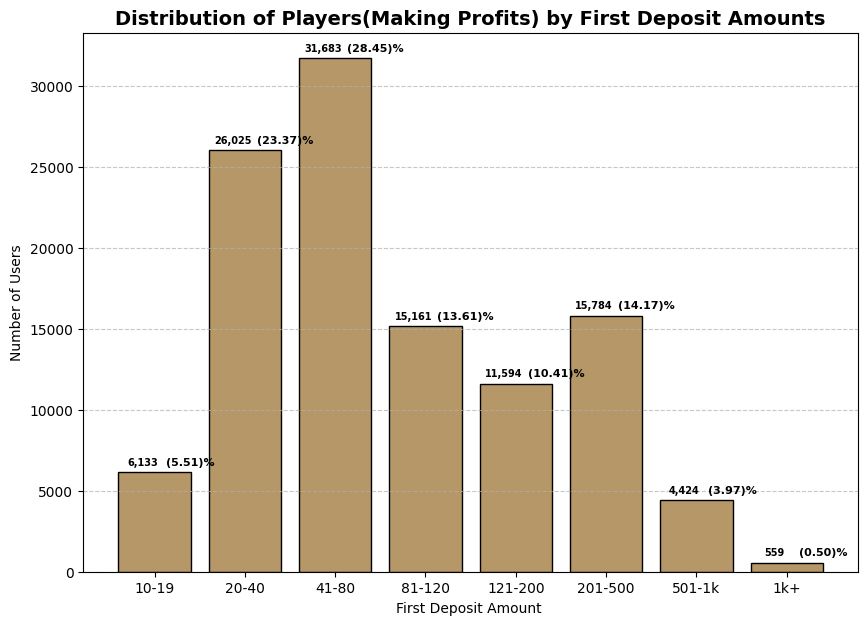

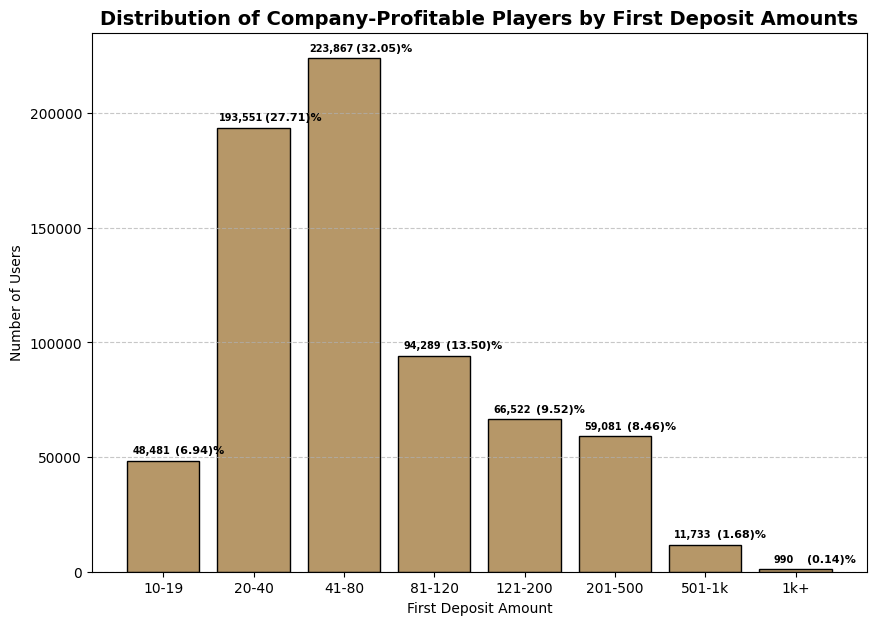

In [156]:
plt.figure(figsize=(10,7))
bars = plt.bar(Customer_profitable_counts.index, Customer_profitable_counts.values, 
               color=[ "#B69768"], 
               edgecolor="black")

for i, bar in enumerate(bars):
    height = bar.get_height()

    
    plt.text(bar.get_x() + bar.get_width()/3, height + (0.01*max(Customer_profitable_counts.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=7, fontweight="bold")

    
    plt.text(bar.get_x() + bar.get_width()/2 + 0.13, height + (0.01*max(Customer_profitable_counts.values)),
             f"({Customer_profitable_percent.values[i]:.2f})%", ha='left', va='bottom',
             fontsize=8, fontweight="bold", color="black")

plt.title("Distribution of Players(Making Profits) by First Deposit Amounts", fontsize=14, fontweight="bold")
plt.xlabel("First Deposit Amount ")
plt.ylabel("Number of Users")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



plt.figure(figsize=(10,7))
bars = plt.bar(Company_profitable_counts.index, Company_profitable_counts.values, 
               color=[ "#B69768"], 
               edgecolor="black")

for i, bar in enumerate(bars):
    height = bar.get_height()

    
    plt.text(bar.get_x() + bar.get_width()/3, height + (0.01*max(Company_profitable_counts.values)),
             f"{height:,}", ha='center', va='bottom', fontsize=7, fontweight="bold")

    plt.text(bar.get_x() + bar.get_width()/2 + 0.13, height + (0.01*max(Company_profitable_counts.values)),
             f"({Company_profitable_percent.values[i]:.2f})%", ha='left', va='bottom',
             fontsize=8, fontweight="bold", color="black")

plt.title("Distribution of Company-Profitable Players by First Deposit Amounts", fontsize=14, fontweight="bold")
plt.xlabel("First Deposit Amount")
plt.ylabel("Number of Users")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Low first deposits (10–80): These bins show huge volumes of company-profitable users compared to relatively few customer-profitable ones. 
### This suggests small depositors are less likely to sustain profitability for themselves

### High deposits (501–1k & 1k+): Customer-profitable counts increase relative to base size, showing that highly Interested users can extract profitability, but their overall volume remains limited compared to company gains from the mass of small depositors.